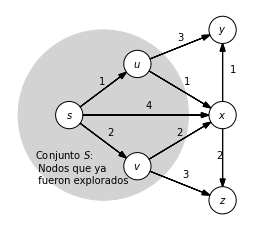

In [107]:
from cmath import atan
from glob import glob
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from matplotlib.patches import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Arrow 
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from IPython.display import clear_output
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import random 

import math
def punto_medio(p1,p2,s,fra): 
    x1,y1 = p1
    x2,y2 = p2 
    dx = x1 - x2 
    dy = y1 - y2 
    ang = (math.pi/2 if dy > 0 else (3*math.pi)/2) if dx == 0 else math.atan(dy/dx)
    ang = ang + 2* math.pi if ang < 0 else ang
    x = math.sqrt((x1- x2)**2 + (y1 - y2)**2)*fra
    y = s 
    xp = x*math.cos(ang) - y*math.sin(ang)
    yp = x*math.sin(ang) + y*math.cos(ang)
    ##llegué a la conclusión que tienes que trasladarlo a el que tiene la menor x 
    xp = xp + (x1 if x1 < x2 else x2) 
    yp = yp + (y1 if x1 < x2 else y2 )
    return (xp,yp)
def inter_points(rad,x1,y1,x2,y2): 
    phi = math.atan2(y2-y1, x2-x1)
    x = x1 + rad * math.cos(phi)
    y = y1 + rad * math.sin(phi)
    return (x,y)
class Fig1: 
    def poner_vert(self):
        self.vert = {"s" :(-2,0), "u":(2,3),"v":(2,-3),"y":(7,5),"x":(7,0),"z" :(7,-5)}
        for l,(x,y) in self.vert.items(): 
            v = Circle((x,y),radius =0.8,facecolor = 'white',edgecolor = 'black')
            self.ax.add_patch(v)
            self.ax.text(x,y,"${}$".format(l),va = 'center',ha='center')
           
    def poner_ars(self): 
        ars = [('s','u',1),('s','v',2),('s','x',4),('u','y',3),('u','x',1),('v','x',2),('v','z',3),('x','y',1),('x','z',2)]
        for (u,v,ps) in ars: 
            xu,yu = self.vert[u]
            xv,yv = self.vert[v]
            p1 = inter_points(0.8,xu,yu,xv,yv)
            p2 = inter_points(0.8,xv,yv,xu,yu)
            p = plt.arrow(p1[0],p1[1],dx = p2[0] - p1[0],dy = p2[1] - p1[1], color = 'black', head_width = 0.3 ,length_includes_head = True)
            self.ax.add_patch(p)
            xm,ym = punto_medio(self.vert[u],self.vert[v], .4,0.5)
            self.ax.text(xm,ym,"{}".format(ps))
    def poner_circulo(self): 
        c=  Circle((0,0),radius = 5,color = 'lightgray')
        self.ax.add_patch(c)
        self.ax.text(-4,-4,"Conjunto $S$:\n Nodos que ya \n fueron explorados")
    def __init__(self): 
        self.fig,self.ax = plt.subplots() 
        #plt.grid()
        plt.axis("off")
        plt.gca().set_aspect('equal', adjustable='box')
        self.poner_circulo()
        self.poner_vert()
        self.poner_ars() 
        self.ax.relim()
        self.ax.autoscale_view()
       
f= Fig1() 